In [26]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from ast import literal_eval
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib.patches import Ellipse
import matplotlib as mpl
import networkx as nx

# Figure 4a-c

In [5]:
df=pd.read_excel(r'path_step_all.xlsx',index_col=0)
dfd=pd.read_excel(r'graph_feature_vector.xlsx',index_col=0)
dfh=pd.read_excel(r'df_Heusler_1134_exclude_La_Alk_not_magnetic.xlsx',index_col=3)
dff=pd.read_csv(r'feature.csv',index_col=0)
dfa=pd.read_excel(r'path_adss_all.xlsx',index_col=0)

for i in df.index:
    if df.at[i,'barrier']<0:
        df.at[i,'barrier']=0

In [6]:
ff=[]
for i in df.index:
    X=dfh.at[i,'X']
    Y=dfh.at[i,'Y']
    Z=dfh.at[i,'Z']
    aE=(dff.at[X,'d-electron']*2+dff.at[Y,'d-electron'])/3
    ff.append(aE)
df['feature']=ff

In [7]:
X=list(dfd.loc[dfd['ads_sys'].isin(dfa['NNH'])]['vt'])
X = np.array([literal_eval(x) for x in X])

In [8]:
pca=PCA(n_components=2)
pca.fit(X)
newX=pca.transform(X)

In [9]:
pca.explained_variance_ratio_

array([0.89182972, 0.07634735])

## Figure 4a

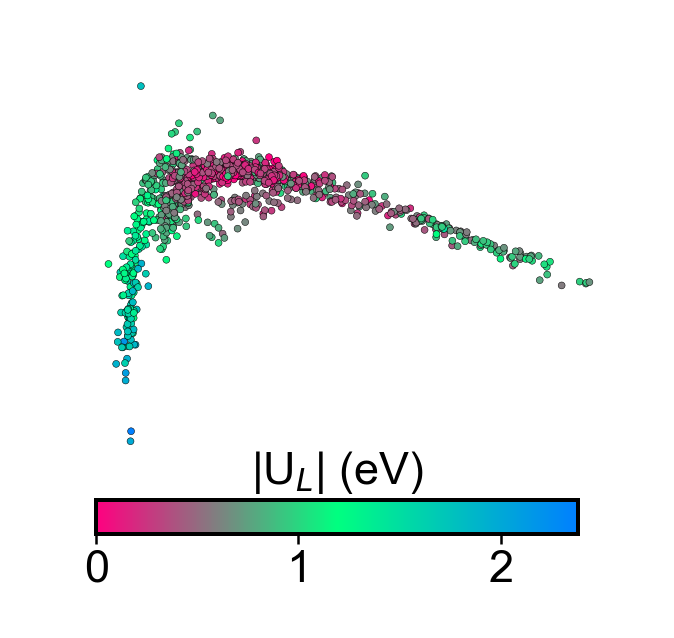

In [12]:
plt.rc('font',family='Arial')
fig=plt.figure(figsize=(4.25/2.54,4/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)
ax0.text(0.5,0.23,'|U$_L$| (eV)',fontsize=9,ha='center',va='center')

ax=fig.add_axes([0.03,0.18,0.94,0.78])
ax.patch.set_alpha(0.0)
ax.tick_params(length=2,width=1,labelsize=7,pad=1)
ax.axis('off')
ax.set_xlim(-1.0,2)
ax.set_ylim(1.06,-0.5)
ax.set_xticks([])
ax.set_yticks([])

cmap=mpl.colors.LinearSegmentedColormap.from_list('count',[(0,'#ff0080'),(0.5,'#00ff80'),(1,'#0080ff')],N=256)
sc=ax.scatter([x[0] for x in newX], [x[1] for x in newX], c=df['barrier'] ,cmap=cmap, s=1.9,lw=0.1,ec='k')

axc=fig.add_axes([0.1,0.12,0.8,0.06])
cbar=plt.colorbar(sc,fraction=0.04,pad=0.03,orientation='horizontal',cax=axc) #,ticks=[-1,0,1]
cbar.ax.tick_params(labelsize=9,length=2,width=0.5,pad=1)

# fig.savefig('Figure_4_a.tif',dpi=360)

## Figure 4b

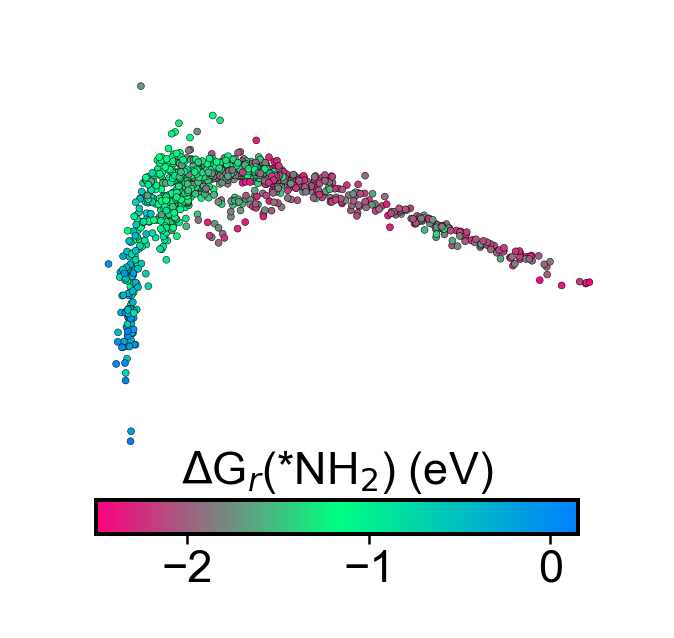

In [13]:
plt.rc('font',family='Arial')
fig=plt.figure(figsize=(4.25/2.54,4/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)
ax0.text(0.5,0.23,'$\Delta$G$_r$(*NH$_2$) (eV)',fontsize=9,ha='center',va='center')

ax=fig.add_axes([0.03,0.18,0.94,0.78])
ax.patch.set_alpha(0.0)
ax.tick_params(length=2,width=1,labelsize=7,pad=1)
ax.axis('off')
ax.set_xlim(-1.,2)
ax.set_ylim(1.06,-0.5)
ax.set_xticks([])
ax.set_yticks([])

cmap=mpl.colors.LinearSegmentedColormap.from_list('count',[(0,'#ff0080'),(0.5,'#00ff80'),(1,'#0080ff')],N=256)
sc=ax.scatter([x[0] for x in newX], [x[1] for x in newX], c=df['NH2']-0.31955 ,cmap=cmap, s=1.9,lw=0.1,ec='k')

axc=fig.add_axes([0.1,0.12,0.8,0.06])
cbar=plt.colorbar(sc,fraction=0.04,pad=0.03,orientation='horizontal',cax=axc) #,ticks=[-1,0,1]
cbar.ax.tick_params(labelsize=9,length=2,width=0.5,pad=1)

# fig.savefig('Figure_4_b.tif',dpi=360)

## Figure 4c

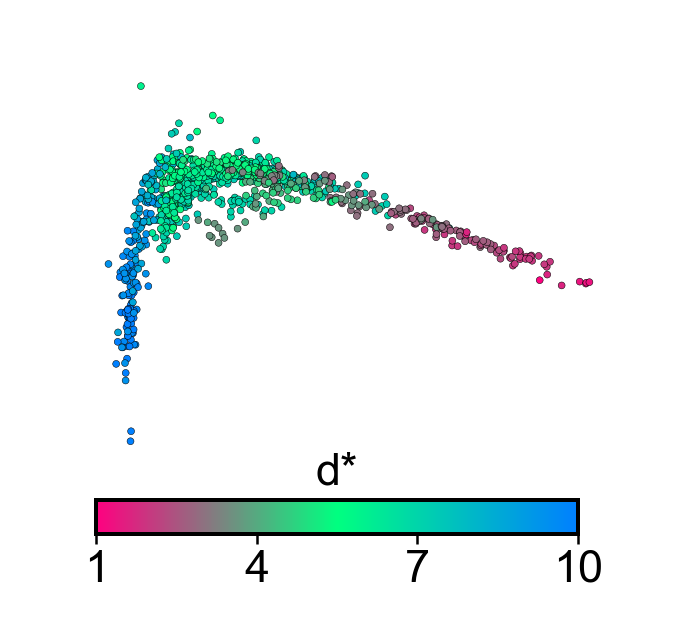

In [14]:
plt.rc('font',family='Arial')
fig=plt.figure(figsize=(4.25/2.54,4/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)
ax0.text(0.5,0.23,'d*',fontsize=9,ha='center',va='center')

ax=fig.add_axes([0.03,0.18,0.94,0.78])
ax.patch.set_alpha(0.0)
ax.tick_params(length=2,width=1,labelsize=7,pad=1)
ax.axis('off')
ax.set_xlim(-1.0,2)
ax.set_ylim(1.06,-0.5)
ax.set_xticks([])
ax.set_yticks([])

cmap=mpl.colors.LinearSegmentedColormap.from_list('count',[(0,'#ff0080'),(0.5,'#00ff80'),(1,'#0080ff')],N=256)
sc=ax.scatter([x[0] for x in newX], [x[1] for x in newX], c=df['feature'] ,cmap=cmap, s=1.9,lw=0.1,ec='k')

axc=fig.add_axes([0.1,0.12,0.8,0.06])
cbar=plt.colorbar(sc,fraction=0.04,pad=0.03,orientation='horizontal',cax=axc,ticks=[1,4,7,10]) #,ticks=[-1,0,1]
cbar.ax.tick_params(labelsize=9,length=2,width=0.5,pad=1)

# fig.savefig('Figure_4_c.tif',dpi=360)

# Figure 4d

In [15]:
l=list(set(list(df['feature'])))
l.sort()
d=dict([(k,[]) for k in set(l)])
X=l
Y=[]
STD=[]
for adsb in ['N2','NNH','NH','NH2','H','NNH-N2','NH2-NH']:
    y=[]
    std=[]
    if adsb != 'NNH-N2' and adsb != 'NH2-NH':
        for x in X:
            y.append(np.mean(df.loc[df['feature']==x][adsb].values))
            std.append(np.std(df.loc[df['feature']==x][adsb].values)/np.sqrt(len(df.loc[df['feature']==x][adsb].values)))
    else:
        for x in X:
            array=df.loc[df['feature']==x][adsb.split('-')[0]].values-df.loc[df['feature']==x][adsb.split('-')[1]].values
            y.append(np.mean(array))
            std.append(np.std(array)/np.sqrt(len(array)))
    Y.append(y)
    STD.append(std)
X=np.array(X)
Y=np.array(Y)
STD=np.array(STD)

NH-NH2 -0.12032019695907502 0.916171340891685
N2-NNH-1 -0.023644786461776698 0.43709405582366045
N2-NNH-2 0.5138540792917062 -3.5251921110108895


Text(2.2, -0.2, 'small U$_L$')

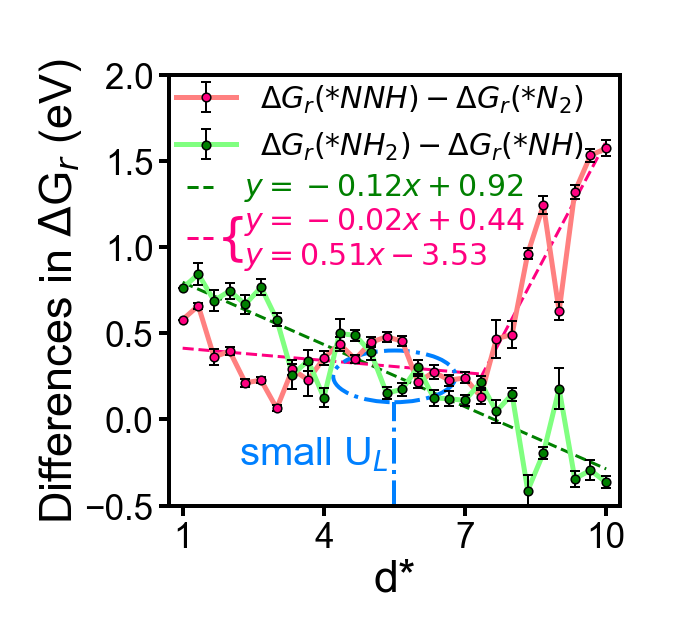

In [18]:
plt.rc('font',family='Arial')
fig=plt.figure(figsize=(4.25/2.54,4/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)

ax=fig.add_axes([0.22,0.17,0.75,0.76])
ax.patch.set_alpha(0.0)
ax.tick_params(length=2,width=0.8,labelsize=7,pad=1)
ax.set_xlabel('d*',fontsize=9,labelpad=1)
ax.set_ylabel('Differences in $\Delta$G$_r$ (eV)',fontsize=9,labelpad=0)
ax.set_xlim(0.7,10.3)
ax.set_xticks([1,4,7,10])
ax.set_ylim(-0.5,2)
ax.scatter(X,Y[-2],c='#ff0080',ec='k',lw=0.3,marker='.',s=12,zorder=66)
ax.scatter(X,Y[-1],c='#008000',ec='k',lw=0.3,marker='.',s=12,zorder=66)
ax.scatter([1.5],[1.87],c='#ff0080',ec='k',lw=0.3,marker='.',s=12,zorder=66)
ax.scatter([1.5],[1.59],c='#008000',ec='k',lw=0.3,marker='.',s=12,zorder=66)
ax.errorbar(X,Y[-2],yerr=STD[-2],elinewidth=0.4,capsize=1,capthick=0.4,barsabove=True,lw=1,c='#ff8080',ecolor='k',label='$\Delta G_r(*NNH)-\Delta G_r(*N_2)$')
ax.errorbar(X,Y[-1],yerr=STD[-1],elinewidth=0.4,capsize=1,capthick=0.4,barsabove=True,lw=1,c='#80ff80',ecolor='k',label='$\Delta G_r(*NH_2)-\Delta G_r(*NH)$')

LR=LinearRegression()
LR.fit(X.reshape(-1,1),Y[-1])
x=np.linspace(1,10,6)
y=LR.predict(x.reshape(-1,1))
ax.plot(x,y,ls='--',lw=0.6,c='#008000',zorder=0)
print('NH-NH2',LR.coef_[0],LR.intercept_)
LR.fit(X[:-9].reshape(-1,1),Y[-2][:-9])
x=np.array([1,3,7.333333333333])
y=LR.predict(x.reshape(-1,1))
ax.plot(x,y,ls='--',lw=0.6,c='#ff0080',zorder=0)
print('N2-NNH-1',LR.coef_[0],LR.intercept_)
LR.fit(X[-9:].reshape(-1,1),Y[-2][-9:])
x=np.array([7.333333333333,9,10])
y=LR.predict(x.reshape(-1,1))
ax.plot(x,y,ls='--',lw=0.6,c='#ff0080',zorder=0)
print('N2-NNH-2',LR.coef_[0],LR.intercept_)

ax.legend(fontsize=6,edgecolor='none',facecolor='none',loc=(-0.01,0.77))

ax.plot([1.1,1.65],[1.35,1.35],ls='--',lw=0.6,c='#008000')
ax.text(2.3,1.35,'$y=-0.12x+0.92$',ha='left',va='center',fontsize=6,c='#008000')
ax.plot([1.1,1.65],[1.05,1.05],ls='--',lw=0.6,c='#ff0080')
ax.text(2.3,1.15,'$y=-0.02x+0.44$',ha='left',va='center',fontsize=6,c='#ff0080')
ax.text(2.3,0.95,'$y=0.51x-3.53$',ha='left',va='center',fontsize=6,c='#ff0080')
ax.text(1.7,1.05,'$\{$',fontsize=10,va='center',ha='left',color='#ff0080')

ax.plot([5.5,5.5],[-0.5,0.10],lw=0.8,ls='-.',zorder=0.6,c='#0080ff')

e=Ellipse(xy=[5.5,0.25],width=2.6,height=0.3,facecolor='none',edgecolor='#0080ff',ls='-.',lw=0.8,zorder=0.3)
ax.add_patch(e)
ax.text(2.2,-0.2,'small U$_L$',ha='left',va='center',fontsize=8,c='#0080ff')

# fig.savefig('Figure_4_d.tif',dpi=360)

# Figure 4e-h

In [19]:
X2Y=[] # screen Heusler alloy groups with same X, Y and almost all Z in dataset
lenZ=[]
cX2Y=[]

for i in df.index:
    X=dfh.at[i,'X']
    Y=dfh.at[i,'Y']
    Z=dfh.at[i,'Z']
    x2y = X+'2'+Y
    
    if x2y not in X2Y:
        X2Y.append(x2y)
        lenz=len(df.loc[df.index.str.contains(x2y)]['N2'].values)
        lenZ.append(lenz)
    
        if lenz == 13:
            cX2Y.append(x2y)
        elif lenz == 12 and x2y+'B' not in df.loc[df.index.str.contains(x2y)].index:
            cX2Y.append(x2y)
Z=['Al','Si','Zn','Ga','Ge','As','In','Sn','Sb','Tl','Pb','Bi']

## Figure 4e

Text(3.0, -0.5, 'Si')

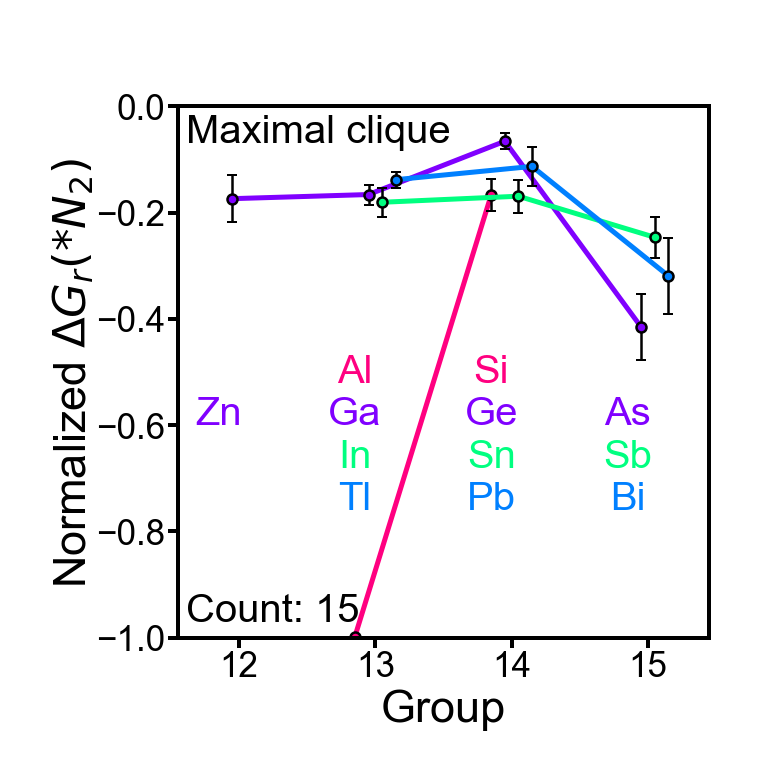

In [34]:
# perform normalization and calculate linear correlation coefficient
H=[] 
adsb='N2'
for x2y in cX2Y:
    h=np.array([df.at[x2y+z,adsb] for z in Z])
    if adsb == 'barrier':
        h=h*-1
    if adsb=='NH' or adsb=='NH2':
        h=h-0.31955
    maxh=max(h)
    minh=min(h)
    length=maxh-minh
    if adsb=='barrier':
        h=(h-maxh)/length
    else:
        h=(h-maxh)/length
    H.append(h)
H=np.array(H)
corH=np.corrcoef(H)
# perform max_cliques algorithm to confirm maximal cliques and complementary clique
pairs=[] 
for i in range(26):
    for j in range(26):
        if corH[i][j]>0.4 and i!=j:
            pair={i,j}
            if pair not in pairs:
                pairs.append(tuple(pair))
G = nx.Graph()
G.add_edges_from(pairs)    
max_cliques = list(nx.find_cliques(G))
cliques=max(max_cliques, key=len)
# calculate mean and std
y1=np.mean(H[cliques],axis=0)
std1=np.std(H[cliques],axis=0)/np.sqrt(len(H[cliques]))
y2=np.mean(H[not_cliques],axis=0)
std2=np.std(H[not_cliques],axis=0)/np.sqrt(len(H[not_cliques]))
# Plot fiture
plt.rc('font',family='Arial')
fig=plt.figure(figsize=(5/2.54,5/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)

ax=fig.add_axes([0.2,0.15,0.75,0.75])
ax.patch.set_alpha(0.0)
ax.tick_params(length=2,width=0.8,labelsize=7,pad=0.6)
ax.set_ylim([-1,0])
ax.set_xlim([0.7,4.6])
ax.set_xticks([1.15,2.15,3.15,4.15])
ax.set_xticklabels(['12','13','14','15'])
ax.set_xlabel('Group',fontsize=9,labelpad=1)
ax.set_ylabel('Normalized $\Delta G_r(*N_2)$',fontsize=9,labelpad=0)

y=y1
std=std1
x1=np.array([2,3])
x2=np.array([2,3,4])
x3=np.array([1,2,3,4])

ax.scatter(x1,y[:2],c='#ff0080',ec='k',lw=0.5,marker='.',s=16,zorder=2)
ax.errorbar(x1,y[:2],yerr=std[:2],elinewidth=0.5,capsize=1,zorder=1,capthick=0.4,barsabove=True,lw=1,c='#ff0080',ecolor='k',label='$\Delta G_r(NNH)-\Delta G_r(N_2)$')
ax.scatter(x3+0.1,y[2:6],c='#8000ff',ec='k',lw=0.5,marker='.',s=16,zorder=12)
ax.errorbar(x3+0.1,y[2:6],yerr=std[2:6],elinewidth=0.5,capsize=1,zorder=11,capthick=0.4,barsabove=True,lw=1,c='#8000ff',ecolor='k',label='$\Delta G_r(NNH)-\Delta G_r(N_2)$')
ax.scatter(x2+0.2,y[6:9],c='#00ff80',ec='k',lw=0.5,marker='.',s=16,zorder=22)
ax.errorbar(x2+0.2,y[6:9],yerr=std[6:9],elinewidth=0.5,capsize=1,zorder=21,capthick=0.4,barsabove=True,lw=1,c='#00ff80',ecolor='k',label='$\Delta G_r(NNH)-\Delta G_r(N_2)$')
ax.scatter(x2+0.3,y[9:12],c='#0080ff',ec='k',lw=0.5,marker='.',s=16,zorder=32)
ax.errorbar(x2+0.3,y[9:12],yerr=std[9:12],elinewidth=0.5,capsize=1,zorder=31,capthick=0.4,barsabove=True,lw=1,c='#0080ff',ecolor='k',label='$\Delta G_r(NNH)-\Delta G_r(N_2)$')

ax.text(0.76,-0.05,'Maximal clique',ha='left',va='center',fontsize=8,zorder=0,c='k')
ax.text(0.76,-0.95,'Count: 15',ha='left',va='center',fontsize=8,zorder=0,c='k')

t1=-0.74
t2=-0.66
t3=-0.58
t4=-0.5
ax.text(2.0,t1,'Tl',fontsize=8,c='#0080ff',ha='center',va='center')
ax.text(3.0,t1,'Pb',fontsize=8,c='#0080ff',ha='center',va='center')
ax.text(4.0,t1,'Bi',fontsize=8,c='#0080ff',ha='center',va='center')
ax.text(2.0,t2,'In',fontsize=8,c='#00ff80',ha='center',va='center')
ax.text(3.0,t2,'Sn',fontsize=8,c='#00ff80',ha='center',va='center')
ax.text(4.0,t2,'Sb',fontsize=8,c='#00ff80',ha='center',va='center')
ax.text(2.0,t3,'Ga',fontsize=8,c='#8000ff',ha='center',va='center')
ax.text(3.0,t3,'Ge',fontsize=8,c='#8000ff',ha='center',va='center')
ax.text(4.0,t3,'As',fontsize=8,c='#8000ff',ha='center',va='center')
ax.text(1.0,t3,'Zn',fontsize=8,c='#8000ff',ha='center',va='center')
ax.text(2.0,t4,'Al',fontsize=8,c='#ff0080',ha='center',va='center')
ax.text(3.0,t4,'Si',fontsize=8,c='#ff0080',ha='center',va='center')

# fig.savefig('Figure_4_e.tif',dpi=360)

## Figure 4f

Text(0.76, -0.13, 'Count: 12')

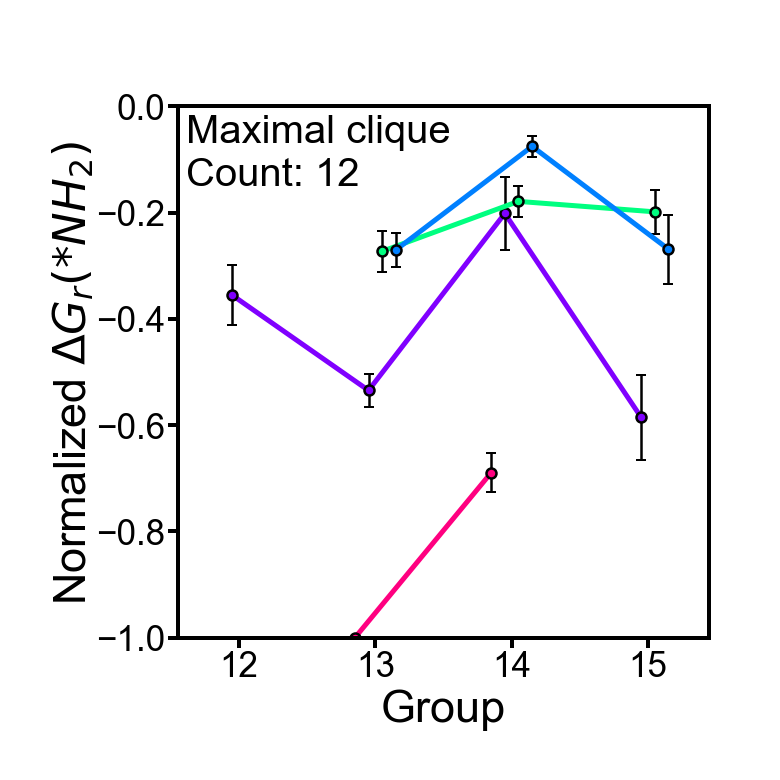

In [35]:
# perform normalization and calculate linear correlation coefficient
H=[] 
adsb='NH2'
for x2y in cX2Y:
    h=np.array([df.at[x2y+z,adsb] for z in Z])
    if adsb == 'barrier':
        h=h*-1
    if adsb=='NH' or adsb=='NH2':
        h=h-0.31955
    maxh=max(h)
    minh=min(h)
    length=maxh-minh
    if adsb=='barrier':
        h=(h-maxh)/length
    else:
        h=(h-maxh)/length
    H.append(h)
H=np.array(H)
corH=np.corrcoef(H)
# perform max_cliques algorithm to confirm maximal cliques
pairs=[] 
for i in range(26):
    for j in range(26):
        if corH[i][j]>0.4 and i!=j:
            pair={i,j}
            if pair not in pairs:
                pairs.append(tuple(pair))
G = nx.Graph()
G.add_edges_from(pairs)    
max_cliques = list(nx.find_cliques(G))
cliques=max(max_cliques, key=len)
not_cliques=[i for i in range(26) if i not in cliques]
# calculate mean and std
y1=np.mean(H[cliques],axis=0)
std1=np.std(H[cliques],axis=0)/np.sqrt(len(H[cliques]))
y2=np.mean(H[not_cliques],axis=0)
std2=np.std(H[not_cliques],axis=0)/np.sqrt(len(H[not_cliques]))
# Plot fiture
plt.rc('font',family='Arial')
fig=plt.figure(figsize=(5/2.54,5/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)

ax=fig.add_axes([0.2,0.15,0.75,0.75])
ax.patch.set_alpha(0.0)
ax.tick_params(length=2,width=0.8,labelsize=7,pad=0.6)
ax.set_ylim([-1,0])
ax.set_xlim([0.7,4.6])
ax.set_xticks([1.15,2.15,3.15,4.15])
ax.set_xticklabels(['12','13','14','15'])
ax.set_xlabel('Group',fontsize=9,labelpad=1)
ax.set_ylabel('Normalized $\Delta G_r(*NH_2)$',fontsize=9,labelpad=0)

y=y1
std=std1
x1=np.array([2,3])
x2=np.array([2,3,4])
x3=np.array([1,2,3,4])

ax.scatter(x1,y[:2],c='#ff0080',ec='k',lw=0.5,marker='.',s=16,zorder=2)
ax.errorbar(x1,y[:2],yerr=std[:2],elinewidth=0.5,capsize=1,zorder=1,capthick=0.4,barsabove=True,lw=1,c='#ff0080',ecolor='k',label='$\Delta G_r(NNH)-\Delta G_r(N_2)$')
ax.scatter(x3+0.1,y[2:6],c='#8000ff',ec='k',lw=0.5,marker='.',s=16,zorder=12)
ax.errorbar(x3+0.1,y[2:6],yerr=std[2:6],elinewidth=0.5,capsize=1,zorder=11,capthick=0.4,barsabove=True,lw=1,c='#8000ff',ecolor='k',label='$\Delta G_r(NNH)-\Delta G_r(N_2)$')
ax.scatter(x2+0.2,y[6:9],c='#00ff80',ec='k',lw=0.5,marker='.',s=16,zorder=22)
ax.errorbar(x2+0.2,y[6:9],yerr=std[6:9],elinewidth=0.5,capsize=1,zorder=21,capthick=0.4,barsabove=True,lw=1,c='#00ff80',ecolor='k',label='$\Delta G_r(NNH)-\Delta G_r(N_2)$')
ax.scatter(x2+0.3,y[9:12],c='#0080ff',ec='k',lw=0.5,marker='.',s=16,zorder=32)
ax.errorbar(x2+0.3,y[9:12],yerr=std[9:12],elinewidth=0.5,capsize=1,zorder=31,capthick=0.4,barsabove=True,lw=1,c='#0080ff',ecolor='k',label='$\Delta G_r(NNH)-\Delta G_r(N_2)$')

ax.text(0.76,-0.05,'Maximal clique',ha='left',va='center',fontsize=8,zorder=0,c='k')
ax.text(0.76,-0.13,'Count: 12',ha='left',va='center',fontsize=8,zorder=0,c='k')

# fig.savefig('Figure_4_f.tif',dpi=360)

## Figure 4g

In [45]:
# search complementary clique
for cluque in max_cliques:
    comple_count=0
    for index in cluque:
        if index not in cliques:
            comple_count+=1
    print(comple_count,cluque)

7 [24, 7, 11, 14, 16, 18, 21, 23, 20]
8 [24, 7, 11, 14, 16, 18, 21, 23, 22]
7 [21, 7, 11, 14, 16, 18, 23, 15, 20]
4 [13, 17, 1, 0, 8, 19, 6]
4 [13, 17, 1, 0, 8, 19, 14]
4 [13, 17, 18, 8, 14, 16, 19, 0]
7 [13, 17, 18, 8, 14, 16, 19, 11, 7, 15]
4 [13, 17, 18, 20, 12, 11, 16, 19, 15]
2 [13, 17, 18, 20, 12, 4, 0, 3, 16, 19]
0 [13, 17, 18, 20, 12, 4, 0, 3, 2, 9, 10, 5]
3 [13, 17, 18, 20, 12, 4, 15, 16, 19]
3 [13, 17, 18, 20, 14, 16, 19, 0]
6 [13, 17, 18, 20, 14, 16, 19, 11, 7, 15]
1 [13, 17, 6, 0, 3, 4, 12, 2, 9, 10, 5]
2 [13, 17, 6, 0, 3, 4, 12, 19]
5 [13, 25, 8, 14, 19, 0, 1]
5 [13, 25, 8, 14, 19, 7]
6 [13, 23, 7, 11, 14, 16, 18, 20, 15]


Text(0.76, -0.95, 'Count: 9')

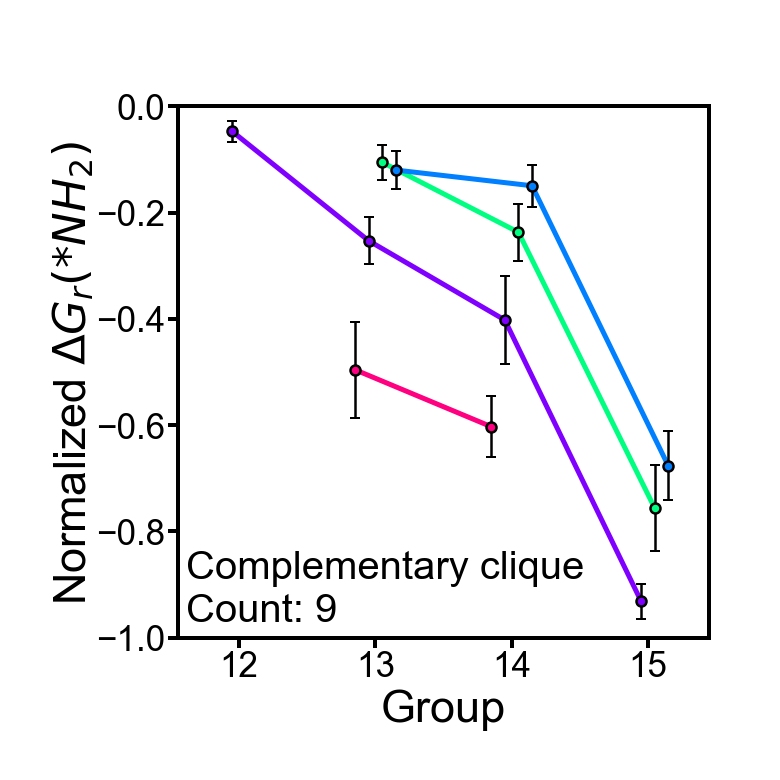

In [49]:
not_cliques=max_cliques[1]
y2=np.mean(H[not_cliques],axis=0)
std2=np.std(H[not_cliques],axis=0)/np.sqrt(len(H[not_cliques]))
# Plot fiture
plt.rc('font',family='Arial')
fig=plt.figure(figsize=(5/2.54,5/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)

ax=fig.add_axes([0.2,0.15,0.75,0.75])
ax.patch.set_alpha(0.0)
ax.tick_params(length=2,width=0.8,labelsize=7,pad=0.6)
ax.set_ylim([-1,0])
ax.set_xlim([0.7,4.6])
ax.set_xticks([1.15,2.15,3.15,4.15])
ax.set_xticklabels(['12','13','14','15'])
ax.set_xlabel('Group',fontsize=9,labelpad=1)
ax.set_ylabel('Normalized $\Delta G_r(*NH_2)$',fontsize=9,labelpad=0)

y=y2
std=std2
x1=np.array([2,3])
x2=np.array([2,3,4])
x3=np.array([1,2,3,4])

ax.scatter(x1,y[:2],c='#ff0080',ec='k',lw=0.5,marker='.',s=16,zorder=2)
ax.errorbar(x1,y[:2],yerr=std[:2],elinewidth=0.5,capsize=1,zorder=1,capthick=0.4,barsabove=True,lw=1,c='#ff0080',ecolor='k',label='$\Delta G_r(NNH)-\Delta G_r(N_2)$')
ax.scatter(x3+0.1,y[2:6],c='#8000ff',ec='k',lw=0.5,marker='.',s=16,zorder=12)
ax.errorbar(x3+0.1,y[2:6],yerr=std[2:6],elinewidth=0.5,capsize=1,zorder=11,capthick=0.4,barsabove=True,lw=1,c='#8000ff',ecolor='k',label='$\Delta G_r(NNH)-\Delta G_r(N_2)$')
ax.scatter(x2+0.2,y[6:9],c='#00ff80',ec='k',lw=0.5,marker='.',s=16,zorder=22)
ax.errorbar(x2+0.2,y[6:9],yerr=std[6:9],elinewidth=0.5,capsize=1,zorder=21,capthick=0.4,barsabove=True,lw=1,c='#00ff80',ecolor='k',label='$\Delta G_r(NNH)-\Delta G_r(N_2)$')
ax.scatter(x2+0.3,y[9:12],c='#0080ff',ec='k',lw=0.5,marker='.',s=16,zorder=32)
ax.errorbar(x2+0.3,y[9:12],yerr=std[9:12],elinewidth=0.5,capsize=1,zorder=31,capthick=0.4,barsabove=True,lw=1,c='#0080ff',ecolor='k',label='$\Delta G_r(NNH)-\Delta G_r(N_2)$')

ax.text(0.76,-0.87,'Complementary clique',ha='left',va='center',fontsize=8,zorder=0,c='k') #Negatively  Positively
ax.text(0.76,-0.95,'Count: 9',ha='left',va='center',fontsize=8,zorder=0,c='k')

# fig.savefig('Figure_4_g.tif',dpi=360)

## Figure 4h

Text(0.76, -0.95, 'Count: 10')

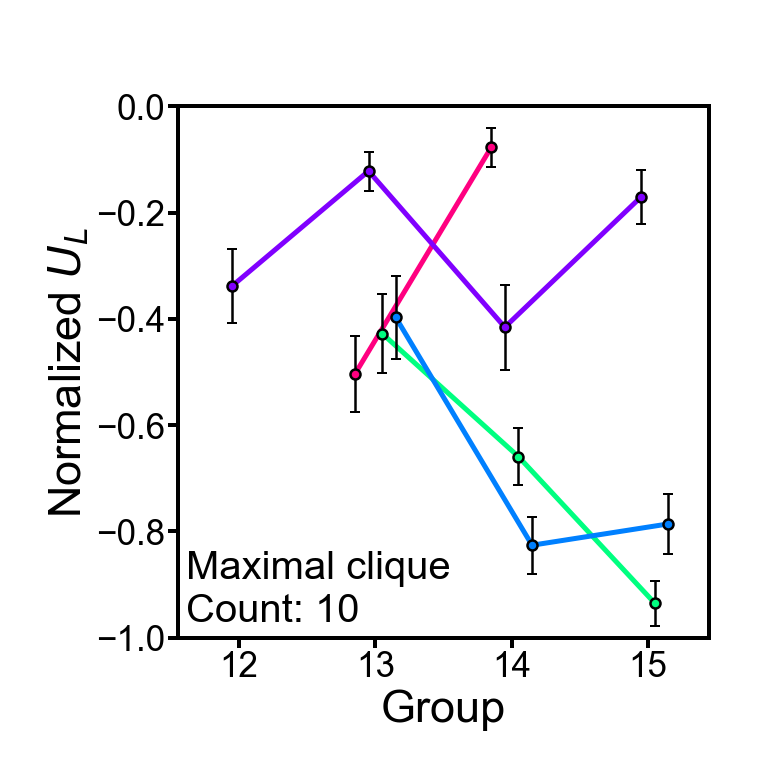

In [32]:
# perform normalization and calculate linear correlation coefficient
H=[] 
adsb='barrier'
for x2y in cX2Y:
    h=np.array([df.at[x2y+z,adsb] for z in Z])
    if adsb == 'barrier':
        h=h*-1
    if adsb=='NH' or adsb=='NH2':
        h=h-0.31955
    maxh=max(h)
    minh=min(h)
    length=maxh-minh
    if adsb=='barrier':
        h=(h-maxh)/length
    else:
        h=(h-maxh)/length
    H.append(h)
H=np.array(H)
corH=np.corrcoef(H)
# perform max_cliques algorithm to confirm maximal cliques and complementary clique
pairs=[] 
for i in range(26):
    for j in range(26):
        if corH[i][j]>0.4 and i!=j:
            pair={i,j}
            if pair not in pairs:
                pairs.append(tuple(pair))
G = nx.Graph()
G.add_edges_from(pairs)    
max_cliques = list(nx.find_cliques(G))
cliques=max(max_cliques, key=len)
not_cliques=[i for i in range(26) if i not in cliques]
# calculate mean and std
y1=np.mean(H[cliques],axis=0)
std1=np.std(H[cliques],axis=0)/np.sqrt(len(H[cliques]))
y2=np.mean(H[not_cliques],axis=0)
std2=np.std(H[not_cliques],axis=0)/np.sqrt(len(H[not_cliques]))
# Plot fiture
plt.rc('font',family='Arial')
fig=plt.figure(figsize=(5/2.54,5/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)

ax=fig.add_axes([0.2,0.15,0.75,0.75])
ax.patch.set_alpha(0.0)
ax.tick_params(length=2,width=0.8,labelsize=7,pad=0.6)
ax.set_ylim([-1,0])
ax.set_xlim([0.7,4.6])
ax.set_xticks([1.15,2.15,3.15,4.15])
ax.set_xticklabels(['12','13','14','15'])
ax.set_xlabel('Group',fontsize=9,labelpad=1)
ax.set_ylabel('Normalized $U_L$',fontsize=9,labelpad=1)

y=y1
std=std1
x1=np.array([2,3])
x2=np.array([2,3,4])
x3=np.array([1,2,3,4])

ax.scatter(x1,y[:2],c='#ff0080',ec='k',lw=0.5,marker='.',s=16,zorder=2)
ax.errorbar(x1,y[:2],yerr=std[:2],elinewidth=0.5,capsize=1,zorder=1,capthick=0.4,barsabove=True,lw=1,c='#ff0080',ecolor='k',label='$\Delta G_r(NNH)-\Delta G_r(N_2)$')
ax.scatter(x3+0.1,y[2:6],c='#8000ff',ec='k',lw=0.5,marker='.',s=16,zorder=12)
ax.errorbar(x3+0.1,y[2:6],yerr=std[2:6],elinewidth=0.5,capsize=1,zorder=11,capthick=0.4,barsabove=True,lw=1,c='#8000ff',ecolor='k',label='$\Delta G_r(NNH)-\Delta G_r(N_2)$')
ax.scatter(x2+0.2,y[6:9],c='#00ff80',ec='k',lw=0.5,marker='.',s=16,zorder=22)
ax.errorbar(x2+0.2,y[6:9],yerr=std[6:9],elinewidth=0.5,capsize=1,zorder=21,capthick=0.4,barsabove=True,lw=1,c='#00ff80',ecolor='k',label='$\Delta G_r(NNH)-\Delta G_r(N_2)$')
ax.scatter(x2+0.3,y[9:12],c='#0080ff',ec='k',lw=0.5,marker='.',s=16,zorder=32)
ax.errorbar(x2+0.3,y[9:12],yerr=std[9:12],elinewidth=0.5,capsize=1,zorder=31,capthick=0.4,barsabove=True,lw=1,c='#0080ff',ecolor='k',label='$\Delta G_r(NNH)-\Delta G_r(N_2)$')

ax.text(0.76,-0.87,'Maximal clique',ha='left',va='center',fontsize=8,zorder=0,c='k') #Negatively  Positively
ax.text(0.76,-0.95,'Count: 10',ha='left',va='center',fontsize=8,zorder=0,c='k')

# fig.savefig('Figure_4_h.tif',dpi=360)